# Create a video from a webcam

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import ipywidgets as widgets
import threading
from IPython.display import display


from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromImagesGUI

In [2]:
project = TrackingProject(name="faceTrack",root_folder = "/home/kevin/Documents/trackingProjects/")

Project directory: /home/kevin/Documents/trackingProjects/faceTrack
Loading /home/kevin/Documents/trackingProjects/faceTrack/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_size': [480, 640], 'unet_features': [64, 128, 256, 512], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'faceTrack', 'normalization_values': {'means': [0.5110162496566772, 0.4608974754810333, 0.4772901237010956], 'stds': [0.2727729380130768, 0.2578601539134979, 0.256255567073822]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (128.0, 0.0, 128.0)], 'objects': ['nose', 'chin', 'rEye', 'lEye'], 'target_radius': 10}


### Creating a video as an example

In this notebook, we will label images from a video. 

In case you don't have a video, you can use a camera to create a small video to work with.

**If you already have your video, jump directly to "Extract Frames from a Video" section**

In [3]:
!ls -ltrh /dev/video*

crw-rw----+ 1 root video 81, 1 Dez 19 10:59 /dev/video1
crw-rw----+ 1 root video 81, 0 Dez 19 10:59 /dev/video0


Get a camera to create a video

In [4]:
camera = USBCamera(width=project.image_size[1], height=project.image_size[0])

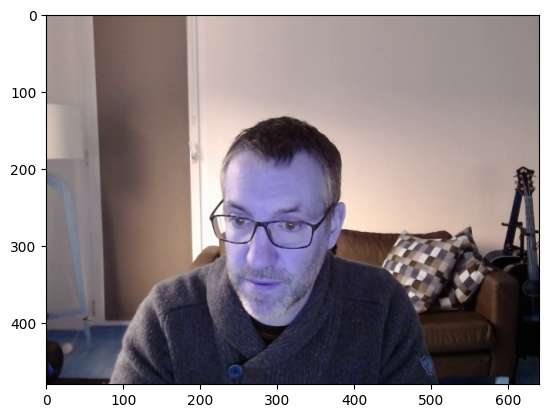

In [5]:
frame = camera.read()
plt.imshow(frame)

Save a video from the camera.

In [7]:
frame2save=30*10
video_fn = '/tmp/video1.avi'
size=project.image_size[1],project.image_size[0]
video = cv2.VideoWriter(video_fn, cv2.VideoWriter_fourcc(*'MJPG'),30, size)

#loop to save the video
for i in range(frame2save):
   frame = camera.read()
   video.write(frame)
    
video.release()